# Álgebra Lineal Numérica: Valores y vectores propios de una matriz cuadrada


*Este cuaderno contiene un extracto traducido y adaptado al español por [Pedro González Rodelas](https://www.ugr.es/~prodelas/) de un capítulo del libro [Python Programming and Numerical Methods - A Guide for Engineers and Scientists](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9), cuyo contenido (en su versión original en inglés) también está disponible online en el siguiente link [Berkeley Python Numerical Methods](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html).*

*El copyright del libro pertenece a Elsevier, pero también se encuentra disponible online la versión interactiva del mismo para una mejor experiencia de aprendizaje. Todos los códigos se publican bajo la licencia [MIT](https://opensource.org/licenses/MIT). Así pues, si encuentra útil este contenido, puede considerar la posibilidad de apoyar este trabajo a través de [Elsevier](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9) o bien [Amazon](https://www.amazon.com/Python-Programming-Numerical-Methods-Scientists/dp/0128195495/ref=sr_1_1?dchild=1&keywords=Python+Programming+and+Numerical+Methods+-+A+Guide+for+Engineers+and+Scientists&qid=1604761352&sr=8-1)!*

<!--NAVIGATION-->
< [Álgebra Lineal Numérica](Prac_AlgebraMatricialNumerica.ipynb) [Método de las potencias](Metodo-Potencias.ipynb)  | [Valores y Vectores Propios con Python](Valores-y-Vectores-propios-con-Python.ipynb)| [Ejercicios](Ejercicios.ipynb)  >

# Planteamiento del Problema

## Definición de valor propio (eigenvalue) y vector propio (eigenvector) 

Es bien sabido que la multiplicación de una cierta matriz $A$ por un vector columna  $\mathbf{X}$, esto es $A\mathbf{X}$, se trataría de aplicarle una transformación lineal a $\mathbf{X}$. Y en algunos casos especiales dicha transformación tiene lugar de la siguiente forma: 

$$A \mathbf{X} = \lambda \mathbf{X}$$

donde $A$ es una matriz $n\times{n}$, $\mathbf{X}$ es un vector columna $n\times{1}$  ($\mathbf{X}\neq\mathbf{0}$), y $\lambda$ es cierto escalar (en principio un número real). Cualquier $\lambda$ que satisfaga la ecuación anterior se dirá que es un  **valor propio** (o "eigenvalue" en inglés y alemán) de la matriz $A$, mientras que el  vector $\mathbf{X}$ se denominará **vector propio** (o "eigenvector" en inglés y alemán) asociado a dicho valor de $\lambda$. 

## Motivación

La motivación existente detrás del concepto de los valores y vectores propios de una matriz cuadrada es que suele ayudarnos a  entender las características fundamentales de la correspondiente transformación lineal, haciendo así las cosas mucho más fáciles. Sabemos que cualquier vector $\mathbf{X}$ puede ser transformado en otro vector diferente $A\mathbf{X}$, al multiplicarlo por la matriz $A$. El efecto de dicha transformación se representará a partir de un posible cierto cambio de longitud y/o dirección del vector imagen. Así pues la ecuación anterior, que satisfacen los valores y vectores propios asociados, señala que para dichos vectores el efecto de la transformación de $A\mathbf{X}$ es solo de tipo escalar (ya sea un estiramiento, compresión o cambio de sentido, pero no de dirección). Dichos vectores propios serán pues aquellos vectores que tendrán dicha propiedad, y los valores propios asociados $\lambda$'s serán los correspondientes factores de escala. Veamos el siguiente ejemplo. 

**PRUÉBELO** Dibujemos primero el vector $\mathbf{X} = {1 \choose 1}$, y a su vez el vector $\mathbf{b} = A\mathbf{X}$, donde $A=\begin{pmatrix} 2 & 0 \\ 0 & 1 \end{pmatrix}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

def plot_vect(x, b, xlim, ylim):
    '''
    función que dibuja dos vectores, 
    x - el vector original
    b - el vector transformado
    xlim - los límites de representación para x
    ylim - los límites de representación para y
    '''
    plt.figure(figsize = (10, 6))
    plt.quiver(0,0,x[0],x[1],\
        color='k',angles='xy',\
        scale_units='xy',scale=1,\
        label='Vector Original')
    plt.quiver(0,0,b[0],b[1],\
        color='g',angles='xy',\
        scale_units='xy',scale=1,\
        label ='Vector Transformado' )
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

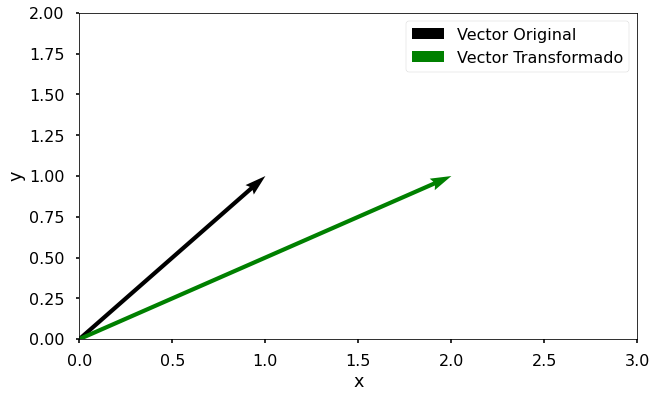

In [3]:
A = np.array([[2, 0],[0, 1]])

X = np.array([[1],[1]])
B = np.dot(A, X)
plot_vect(X,B,(0,3),(0,2))

Podemos ver en la figura generada más arriba que el vector original $\mathbf{X}$ se gira y se estira al ser transformado mediante la aplicación $A$. Concretamente el vector $\mathbf{X} = {1 \choose 1}$ es transformado en el vector $\mathbf{X} = {2 \choose 1}$.

Pero hagámos ahora el mismo ejercicio con un vector diferente, como por ejemplo $\mathbf{X} = {1 \choose 0}$. 

**¡PROBÉMOSLO!** Si dibujamos ahora tanto el vector $\mathbf{X} = {1 \choose 1} $ como el vector imagen $\mathbf{b} = A\mathbf{X}$, con la misma matriz que antes  $A=\begin{pmatrix} 2 & 0 \\ 0 & 1 \end{pmatrix}$.

In [ ]:
X = np.array([[1], [0]])
B = np.dot(A, x)

plot_vect(X,B,(0,3),(-0.5,0.5))

Ahora podemos ver que con este nuevo vector, lo único que cambia tras la transformación es la longitud del vector imagen, que es estirado; de manera que el nuevo vector resulta ser $\mathbf{X} = {2 \choose 0} $, y por lo tanto 
 
$$ A\mathbf{X} = 2\mathbf{X}$$

con $\mathbf{X} = {1 \choose 0} $ y $\lambda=2$. Vemos claramente que la direción del vector no cambia en absoluto (no hay rotación alguna).

También se podría probar con otro de los vectores propios de esta matriz, $\mathbf{X} = {0 \choose 1}$; ¡compruébelo usted mismo!. 

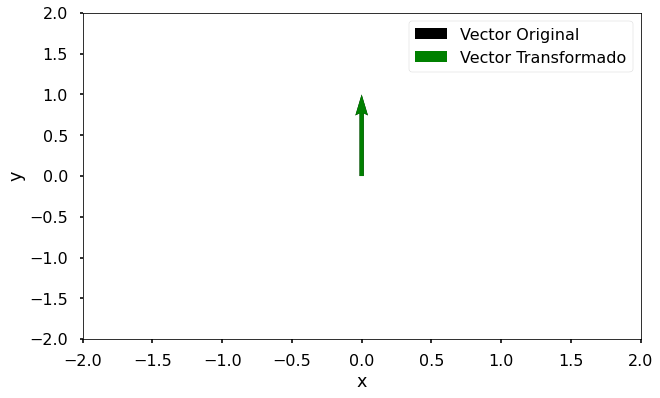

In [4]:
X = np.array([[0], [1]])
B = np.dot(A, X)

plot_vect(X,B,(-2,2),(-2,2))

In [5]:
# Aquí el caso es que ambos vectores son exactamente el mismo 
X, B

(array([[0],
        [1]]),
 array([[0],
        [1]]))

## La ecuación característica 

Para obtener los valores y los vectores propios, a partir de $A\mathbf{X}=\lambda\mathbf{X}$, podemos obtener la siguiente relación o expresión:

$$(A-\lambda{I})\mathbf{X}=0$$

donde $I$ es la matriz identidad de las mismas dimensiones que $A$. Así pues, si la matriz $A-\lambda{I}$ tiene inversa, entonces multiplicando ambos miembros por $(A-\lambda{I})^{-1}$, obtendríamos la solución trivial $\mathbf{X}=\mathbf{0}$. Por lo tanto, cuando $A-\lambda{I}$ sea singular (y no exista inversa, porque su determinante sea nulo), será precisamente cuando obtengamos soluciones no triviales:

$$det(A-\lambda{I})=0$$

esta ecuación se denomina **ecuación característica**, que conducirá a una ecuación polinómica para $\lambda$, y será a través de ella que podremos calcular los valores propios de la matriz. Veamos un ejemplo. 

**¡PRUÉBELO!** Obtenga los valores propios de la matriz 
$A=\begin{pmatrix} 0 & 2 \\ 2 & 3 \end{pmatrix}$.

La ecuación caracteristica nos da en este caso

$$
\begin{vmatrix}
0-\lambda & 2 \\ 
2 & 3-\lambda
\end{vmatrix}
=0
$$

Por lo tanto, tendremos 

$$-\lambda(3-\lambda)-4 = 0 \Rightarrow \lambda^2-3\lambda-4=(\lambda-4)(\lambda+1)=0$$

y obtenemos dos valores propios (o "eigenvalues"):

$$\lambda_1 = 4, \lambda_2 = -1$$

**PRUEBE** ahora a obtener los vectores propios (o "eigenvectors") de los valores propios obtenidos anteriormente.

Calculemos en primer lugar el vector propio asociado al valor propio  $\lambda_1 = 4$, podemos simplemente insertarlo de nuevo en $(A-\lambda{I})\mathbf{X}=\mathbf{0}$, con $\mathbf{X}\equiv{x_1 \choose x_2}$ y obtendríamos:

$$
\begin{bmatrix}
-4 & 2 \\
2 & -1 \\
\end{bmatrix}
\begin{bmatrix}
x_1\\x_2\\
\end{bmatrix}
=\begin{bmatrix}
0\\0\\
\end{bmatrix}
$$

Por lo tanto, tendremos dos ecuaciones lineales: $-4x_1+2x_2=0$ y $2x_1-x_2=0$, pero evidentemente resultan linealmente dependientes, con lo cuál ambas indicarán que $x_2=2x_1$, y obtendremos el primer vector propio como 

$$\mathbf{X}_1 = k_1\begin{bmatrix}
1\\2\\
\end{bmatrix}$$

$k_1$ es un escalar ($k_1 \neq 0$), pero siempre y cuando tengamos la relación entre $x_2$ y $x_1$ de 2, este será un autovector. De hecho podemos también verificar que el vector $1 \choose 2$ es efectivamente un autovector, sin más que insertarlo de nuevo en la correspondiente expresión:

$$
\begin{bmatrix}
0 & 2 \\
2 & 3 \\
\end{bmatrix}
\begin{bmatrix}
1\\2\\
\end{bmatrix}
=\begin{bmatrix}
4\\8\\
\end{bmatrix}
=4\begin{bmatrix}
1\\2\\
\end{bmatrix}
$$

Insertando ahora $\lambda_2=-1$, de manera similar a la anterior, podríamos obtener el otro autovector como sigue, donde $k_2 \neq 0$:
$$\mathbf{X}_2 = k_2\begin{bmatrix}
-2\\1\\
\end{bmatrix}$$

Del ejemplo anterior podemos ver cómo podemos ir obteniendo los valores propios y autovectores de la matriz $A$, y que la elección de los autovectores de una matriz no es única. Pero las cosas se volverán realmente complicadas cuando tengas una matriz más grande $A$, ya que cuando se intente resolver la ecuación característica determinada por el polinomio de grado $n$ correspondiente, también se tendrá que usar algún método numérico apropiado. Afortunadamente, se han desarrollado también muchos métodos numéricos diferentes para resolver los problemas de valores propios para matrices más grandes, entre los que se encuentran el conocido método de las potencias, y el denominado método QR (algo más complejo, pero más eficiente cuando se quieren aproximar todos los valores propios de la matriz $A$, y o solo el dominante). 

No obstante, todos estos cálculos también los podríamos haber realizado de manera simbólica gracias al módulo SymPy de Python, combinandolo también adecuadamente con alguna que otra función o método del módulo NumPy, como podemos ver justo a continuación.

In [6]:
import sympy as sp
import numpy as np

In [7]:
A = sp.Matrix([[0,2],[2,3]])
A

Matrix([
[0, 2],
[2, 3]])

In [8]:
I = sp.Matrix(np.eye(2).astype(int)) # aquí con .astype(int)  
I      # forzamos valores enteros para esta matriz identidad

Matrix([
[1, 0],
[0, 1]])

In [9]:
λ = sp.Symbol('λ')  # usaremos esta letra griega \lambda como símbolo

In [10]:
sp.det(A-λ*I)       # así obtendríamos la ecuación característica de A

λ**2 - 3*λ - 4

In [11]:
λs = sp.solve(sp.det(A-λ*I),λ) # que resolvemos aquí simbólicamente
λs            # y guardamos sus soluciones como una lista de Python

[-1, 4]

In [12]:
# Ahora podemos recuperar la matriz A-λ*I para cada valor propio obtenido
A-λs[0]*I     

Matrix([
[1, 2],
[2, 4]])

In [14]:
# Y si definimos como símbolos 
x1, x2 = sp.symbols('x1, x2') # un vector con el número suficiente
X = sp.Matrix([[x1],[x2]])       # de componenente
X

Matrix([
[x1],
[x2]])

In [15]:
# podremos resolver el correspondiente sistema lineal homogéneo
sp.solve((A-λs[0]*I)*X,list(X))  # con solución genérica indeterminada

{x1: -2*x2}

In [16]:
sp.solve((A-λs[1]*I)*X,list(X)) # e igualmente para el otro valor propio

{x1: x2/2}

Vemos claramente que estos resultados obtenidos ahora de manera simbólica con la ayuda del módulo SymPy coinciden exactament con los resultados mostrados un poco más arriba realizados manualmente.

<!--NAVIGATION-->
< [Álgebra Lineal Numérica](Prac_AlgebraMatricialNumerica.ipynb) [Método de las potencias](Metodo-Potencias.ipynb)  | [Valores y Vectores Propios con Python](Valores-y-Vectores-propios-con-Python.ipynb)| [Ejercicios](Ejercicios.ipynb)  >